In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn 

In [2]:
data = np.genfromtxt("../../data/data.dat")
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
print(df.head())
print(df.shape[0])

      ustat     alph1     alph2  beta       chi
0  8.408213  2.344511  2.344511  60.0  1.094479
1  7.006844  2.344511  2.344511  60.0  0.840347
2  5.255133  2.344511  2.344511  60.0  0.772829
3  3.503422  2.344511  2.344511  60.0  0.811944
4  2.102053  2.344511  2.344511  60.0  0.844523
404


In [3]:
# extract wanted values, convert into array
ustat_chi = df.iloc[:,[0,4]].values

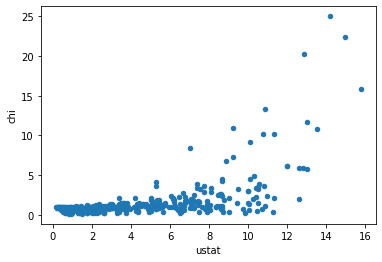

In [4]:
scatter1 = df.plot.scatter(x='ustat', y='chi')

In [5]:
# Bowman's grouping of Small Chi (y < 3) and Large Chi (y >= 3)

In [6]:
small_chi = np.genfromtxt("../../data/Small_chi.dat")
small_chi = np.delete(small_chi, 0, 0)
small_chi_df = pd.DataFrame(small_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
print(small_chi_df.head())
print(small_chi_df.shape[0])

      ustat     alph1     alph2  beta       chi
0  8.408213  2.344511  2.344511  60.0  1.094479
1  7.006844  2.344511  2.344511  60.0  0.840347
2  5.255133  2.344511  2.344511  60.0  0.772829
3  3.503422  2.344511  2.344511  60.0  0.811944
4  2.102053  2.344511  2.344511  60.0  0.844523
366


In [7]:
large_chi = np.genfromtxt("../../data/Large_chi.dat")
large_chi = np.delete(large_chi, 0, 0)
large_chi_df = pd.DataFrame(large_chi, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
print(large_chi_df.head())
print(large_chi_df.shape[0])

       ustat     alph1     alph2  beta        chi
0  10.510266  2.344511  2.344511  60.0   3.280779
1  15.747414  1.459300  1.459300  60.0  15.873000
2   9.215366  1.499488  1.499488  89.3  10.877743
3   7.372293  1.499488  1.499488  89.3   3.841368
4  12.984962  2.438502  2.076896  46.7   5.734794
38


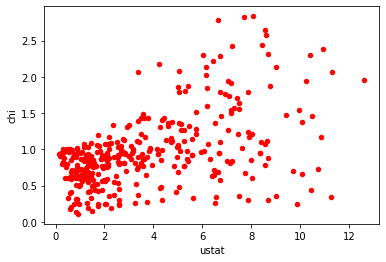

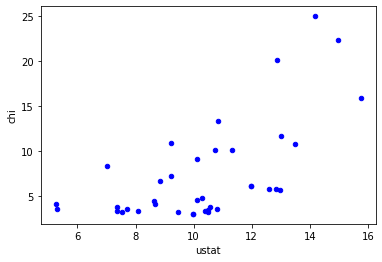

In [8]:
scatter2 = small_chi_df.plot.scatter(x='ustat', y='chi', c = "red")
scatter2 = large_chi_df.plot.scatter(x='ustat', y='chi', c = "blue")

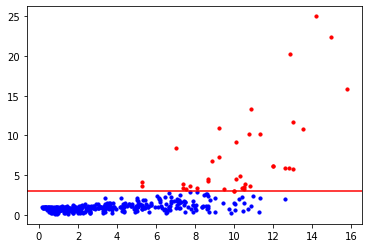

In [9]:
plt.scatter(small_chi_df['ustat'], small_chi_df['chi'], s = 10, c = 'blue')
plt.scatter(large_chi_df['ustat'], large_chi_df['chi'], s = 10, c = 'red')
plt.axhline(y=3, color='r', linestyle='-')

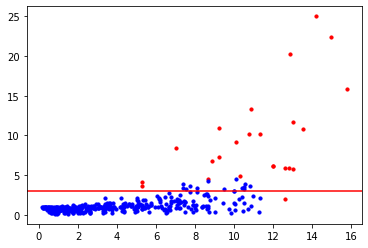

In [10]:
# DBSCAN from Day 01

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=6)
labels = dbscan.fit_predict(ustat_chi)
plt.scatter(ustat_chi[labels== -1,0], ustat_chi[labels == -1,1], s = 10, c = 'red')
plt.scatter(ustat_chi[labels== 0,0], ustat_chi[labels == 0,1], s = 10, c = 'blue')
plt.axhline(y=3, color='r', linestyle='-')

In [11]:
# let's trying working with Bowman's chi labels.

In [12]:
# Feature Engineering

In [13]:
# CHI

# small chi = 0
# large chi = 1
labels = []
for i in df['chi']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['chi'] = labels

In [14]:
# USTAT

# small ustat = 0
# large ustat = 1

labels = []
for i in df['ustat']:
    if i < 3:
        labels.append(0)
    else:
        labels.append(1)
        
df['ustat'] = labels

In [15]:
# ALPH1

# small alph1 = 0
# medium alph1 = 1
# large alph1 = 2

labels = []
for i in df['alph1']:
    if i < 1:
        labels.append(0)
    elif i >= 1 and i < 2:
        labels.append(1)
    else:
        labels.append(2)
        
df['alph1'] = labels

In [16]:
# ALPH2

# small alph2 = 0
# large alph2 = 1

labels = []
for i in df['alph2']:
    if i < 2:
        labels.append(0)
    else:
        labels.append(1)
        
df['alph2'] = labels

In [17]:
# BETA

# small beta = 0
# large beta = 1
labels = []
for i in df['beta']:
    if i < 50:
        labels.append(0)
    else:
        labels.append(1)
        
df['beta'] = labels

In [18]:
df

,ustat,alph1,alph2,beta,chi
0,1,2,1,1,0
1,1,2,1,1,0
2,1,2,1,1,0
3,1,2,1,1,0
4,0,2,1,1,0
...,...,...,...,...,...
399,1,2,1,0,1
400,1,2,1,0,1
401,1,2,1,0,1
402,1,1,1,0,1


In [19]:
#df.to_csv("../../data/day02.csv", index = False)